## General plots for occurrences, timing (seasonal/diurnal), nose heights, wind direction

### Imports, data read in

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon
from windrose import plot_windrose
from mycolorpy import colorlist as mcp

In [2]:
# data_path = '../LLJ_data/'
data_path = '../detection2/'
# nwf
vwcent_nwf = pd.read_csv(data_path + 'NWF_vwcent.csv')
nebuoy_nwf = pd.read_csv(data_path + 'NWF_nebuoy.csv')
nebuoy_nwf = pd.concat([nebuoy_nwf.set_index('Time').loc['2019-09-01':'2019-11-01'], 
                        nebuoy_nwf.set_index('Time').loc['2020-07-01':]]).reset_index()
southcent_nwf = pd.read_csv(data_path + 'NWF_southcent.csv')
swbuoy_nwf = pd.read_csv(data_path + 'NWF_swbuoy.csv')
swcorner_nwf = pd.read_csv(data_path + 'NWF_vwcorner.csv')

# wf
vwcent_wf = pd.read_csv(data_path + 'VW100_vwcent.csv')
nebuoy_wf = pd.read_csv(data_path + 'CA100_nebuoy.csv')
nebuoy_wf = pd.concat([nebuoy_wf.set_index('Time').loc['2019-09-01':'2019-11-01'], 
                        nebuoy_wf.set_index('Time').loc['2020-07-01':]]).reset_index()
southcent_wf = pd.read_csv(data_path + 'LA100_southcent.csv')
swbuoy_wf = pd.read_csv(data_path + 'CA100_swbuoy.csv')
swcorner_wf = pd.read_csv(data_path + 'VW100_vwcorner.csv')

# combine
nwf = pd.concat([vwcent_nwf, nebuoy_nwf, southcent_nwf, swbuoy_nwf, swcorner_nwf])
wf = pd.concat([vwcent_wf, nebuoy_wf, southcent_wf, swbuoy_wf, swcorner_wf])

# combine but leave out ne and sw buoys
nwf_nobuoy = pd.concat([vwcent_nwf, southcent_nwf, swcorner_nwf])
wf_nobuoy = pd.concat([vwcent_wf, southcent_wf, swcorner_wf])

### Occurrences in each location

In [3]:
def gen_class_arr(locs):
    '''
    Generate an array that has shape (4, 5)
        - each row is one LLJ classification
        - each column is one location
        - each value is an array that corresponds to the location and class
    '''
    l0 = []
    l1 = []
    l2 = []
    l3 = []
    for loc in locs:
        if 'BVF' in loc.columns:
            loc = loc.drop(columns='BVF')
        loc = loc.dropna()
        l0.append(len(loc['LLJ-classification'][loc['LLJ-classification']==0]))
        l1.append(len(loc['LLJ-classification'][loc['LLJ-classification']==1]))
        l2.append(len(loc['LLJ-classification'][loc['LLJ-classification']==2]))
        l3.append(len(loc['LLJ-classification'][loc['LLJ-classification']==3]))
        
    # the actual values of the heights
    heights = np.array([l0, l1, l2, l3], dtype=object)
    
    new = []
    for i in range(len(locs)):
        a = correct_hgt(heights.transpose()[i])
        new.append(a)
    heights_plot = np.array(new).transpose()
        
    return heights, heights_plot

In [4]:
def correct_hgt(arr):
    arr2 = arr.copy()
    
    for i in range(4):
        arr2[i] = sum(arr[i:])
        
    return arr2

In [5]:
nwf_class, nwf_class_plot = gen_class_arr([vwcent_nwf, swcorner_nwf, southcent_nwf, nebuoy_nwf, swbuoy_nwf])
wf_class, wf_class_plot = gen_class_arr([vwcent_wf, swcorner_wf, southcent_wf, nebuoy_wf, swbuoy_wf])

each row is a LLJ class, each column is a location. We want to make a table where we look at the percent reduction in occurrences in each LLJ class between wf and nwf

In [6]:
def find_pct_dif(nwf, wf):
    '''
    FInd the percent difference in LLJs for each classification between nwf and wf
    
    both nwf and wf have rows for each class and cols for each loc
    '''
    
    diff = nwf - wf
    pct = (diff / nwf) *100
    
    return pct

[vwcent_nwf, swcorner_nwf, southcent_nwf, nebuoy_nwf, swbuoy_nwf]

In [7]:
pdiffs = find_pct_dif(nwf_class, wf_class)

In [8]:
pdiffs[0]

array([21.241258741258743, 12.20159151193634, 25.148683092608326,
       27.684964200477324, 41.343669250645995], dtype=object)

In [25]:
pdiffs[1]

array([24.41430332922318, 9.22882427307206, 21.281741233373637,
       44.48051948051948, 55.90277777777778], dtype=object)

In [26]:
pdiffs[2]

array([22.17573221757322, 8.786610878661087, 21.022727272727273,
       65.3061224489796, 85.36585365853658], dtype=object)

In [27]:
pdiffs[3]

array([6.451612903225806, 10.0, 9.836065573770492, 40.0,
       -42.857142857142854], dtype=object)

In [11]:
1144-901

243

In [12]:
(243/1144)*100

21.241258741258743

In [9]:
nwf_ttls = np.sum(nwf_class, axis=1); nwf_ttls

array([4258, 3025, 744, 246], dtype=object)

In [36]:
(len(swcorner_nwf.dropna())-len(swcorner_wf.dropna())) / len(swcorner_nwf.dropna())

0.107095046854083

In [7]:
nwf_class

array([[1144, 1131, 1177, 419, 387],
       [811, 791, 827, 308, 288],
       [239, 239, 176, 49, 41],
       [93, 80, 61, 5, 7]], dtype=object)

In [10]:
wf_class

array([[901, 993, 881, 303, 227],
       [613, 718, 651, 171, 127],
       [186, 218, 139, 17, 6],
       [87, 72, 55, 3, 10]], dtype=object)

In [7]:
nwf_class_plot

array([[2287, 2241, 2241, 781, 723],
       [1143, 1110, 1064, 362, 336],
       [332, 319, 237, 54, 48],
       [93, 80, 61, 5, 7]], dtype=object)

In [33]:
wf_class_plot[:, :3]

array([[1787, 2001, 1726],
       [886, 1008, 845],
       [273, 290, 194],
       [87, 72, 55]], dtype=object)

In [32]:
nwf_ams_plot = np.array([[2287, 2241, 2241],
                         [1143, 1064, 1110],
                         [332, 237, 319],
                         [93, 61, 80]])

In [34]:
wf_ams_plot = np.array([[1787, 1726, 2001],
                         [886, 845, 1008],
                         [273, 194, 290],
                         [87, 55, 72]])

In [56]:
x2 = np.array([0, 0.3, 0.6])

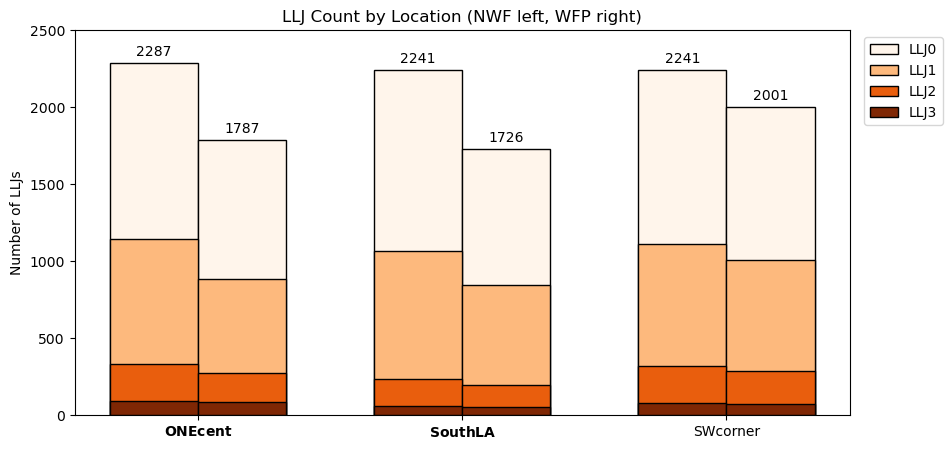

In [61]:
colors_nwf = mcp.gen_color(cmap="Oranges", n=4)
colors_wf = mcp.gen_color(cmap="Oranges", n=4)

labels = [r'$\bf{ONEcent}$',
          r'$\bf{SouthLA}$',
          'SWcorner']

plt.figure(figsize=(10, 5))

ax = plt.gca()

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

# loop through each LLJ class
for i in range(4):
    rects1 = ax.bar(x2 - width/2, height=nwf_ams_plot[:, :3][i], color=colors_nwf[i], width=width, edgecolor='k', label=f'LLJ{i}')
    rects2 = ax.bar(x2 + width/2, height=wf_ams_plot[:, :3][i], color=colors_wf[i], width=width, edgecolor='k')
    if i == 0:
        ax.bar_label(rects1, padding=3)
        ax.bar_label(rects2, padding=3)
        
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim(0, 2500)
ax.set_ylabel('Number of LLJs')
ax.set_title('LLJ Count by Location (NWF left, WFP right)')
ax.set_xticks(x2, labels)
ax.legend(bbox_to_anchor=(1.01, 1))

plt.savefig('../output_plots/paper_plots/LLJ_count_ams.png')

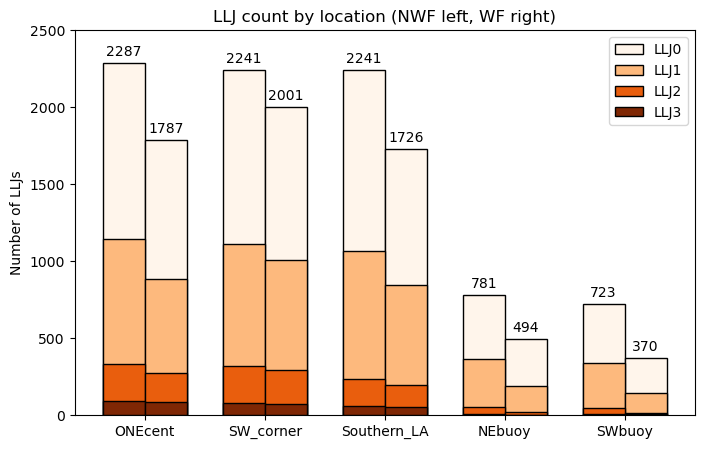

In [10]:
colors_nwf = mcp.gen_color(cmap="Oranges", n=4)
colors_wf = mcp.gen_color(cmap="Oranges", n=4)

labels = ['ONEcent',
          'SWcorner',
          'SouthLA',
          'NEbuoy',
          'SWbuoy']

plt.figure(figsize=(8, 5))

ax = plt.gca()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# loop through each LLJ class
for i in range(4):
    rects1 = ax.bar(x - width/2, height=nwf_class_plot[i], color=colors_nwf[i], width=width, edgecolor='k', label=f'LLJ{i}')
    rects2 = ax.bar(x + width/2, height=wf_class_plot[i], color=colors_wf[i], width=width, edgecolor='k')
    if i == 0:
        ax.bar_label(rects1, padding=3)
        ax.bar_label(rects2, padding=3)
        
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim(0, 2500)
ax.set_ylabel('Number of LLJs')
ax.set_title('LLJ count by location (NWF left, WF right)')
ax.set_xticks(x, labels)
ax.legend(loc=1)

# plt.savefig('../output_plots/paper_plots/LLJ_count.png')

#### try to add in column for nebuoy and swbuoy

In [11]:
from matplotlib.patches import Rectangle

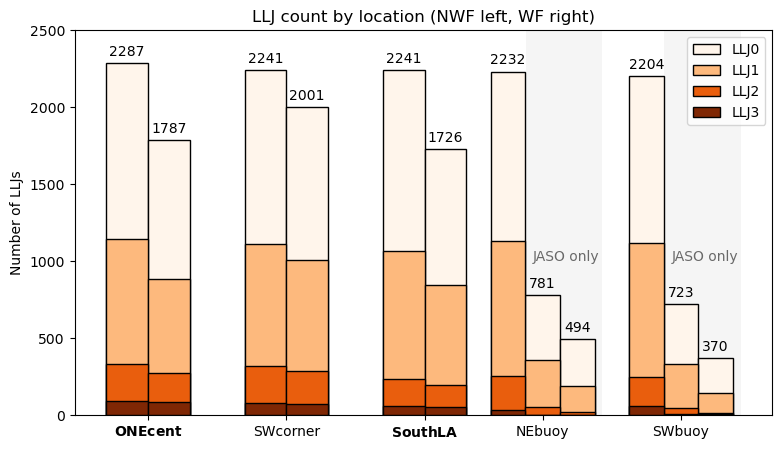

In [14]:
colors_nwf = mcp.gen_color(cmap="Oranges", n=4)
colors_wf = mcp.gen_color(cmap="Oranges", n=4)

# labels = ['VWcent',
#           'SW_corner',
#           'Southern_LA',
#           'NEbuoy',
#           'SWbuoy']
labels = [r'$\bf{ONEcent}$',
          'SWcorner',
          r'$\bf{SouthLA}$',
          'NEbuoy',
          'SWbuoy']

linestyles = ['solid', 'solid', 'solid', 'dashed', 'dashed']

# labels= [r"$\bf{one}$", r"$\bf{two}$", r"$\bf{three}$", r"$\bf{four}$", r"$\bf{four}$"]

plt.figure(figsize=(9, 5))

ax = plt.gca()

rectangle1 = plt.Rectangle((2.88, 0), 0.55, 2500, fc='whitesmoke')
ax.add_patch(rectangle1)

rectangle2 = plt.Rectangle((3.88, 0), 0.55, 2500, fc='whitesmoke')
ax.add_patch(rectangle2)

x = np.arange(len(labels))  # the label locations
width = [0.3, 0.3, 0.3, 0.25, 0.25]  # the width of the bars

# create data for the thrid bar on ne and sw buoys
nebuoy_nwf_full = pd.read_csv('../detection2/NWF_nebuoy_full.csv')
swbuoy_nwf_full = pd.read_csv('../detection2/NWF_swbuoy_full.csv')

buoys_class, buoys_plot = gen_class_arr([nebuoy_nwf_full, swbuoy_nwf_full])
t = np.full((4, 5), np.nan)

for i, el in enumerate(t):
    el[3] = buoys_plot[i][0]
    el[4] = buoys_plot[i][1]

# loop through each LLJ class
for i in range(4):
    rects0 = ax.bar(x - width, height=t[i], color=colors_wf[i], width=width, edgecolor='k')
    rects1 = ax.bar(x, height=nwf_class_plot[i], color=colors_nwf[i], width=width, edgecolor='k', label=f'LLJ{i}')
    rects2 = ax.bar(x + width, height=wf_class_plot[i], color=colors_wf[i], width=width, edgecolor='k')
    if i == 0:
        ax.bar_label(rects1, padding=3)
        ax.bar_label(rects2, padding=3)
        ax.bar_label(rects0, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim(0, 2500)
ax.set_ylabel('Number of LLJs')
ax.set_title('LLJ count by location (NWF left, WF right)')
ax.set_xticks(x2, labels)
ax.legend(loc=1)

ax.text(2.93, 1000, 'JASO only', color='dimgrey')
ax.text(3.93, 1000, 'JASO only', color='dimgrey')

plt.savefig('../output_plots/paper_plots/LLJ_countv4.png')

In [35]:
x

array([0, 1, 2, 3, 4])

In [13]:
x2 = np.array([0.15, 1.15, 2.15, 3, 4])

In [28]:
t

array([[  nan,   nan,   nan, 2232., 2204.],
       [  nan,   nan,   nan, 1129., 1121.],
       [  nan,   nan,   nan,  258.,  250.],
       [  nan,   nan,   nan,   34.,   57.]])

In [10]:
locs_nwf = [vwcent_nwf, southcent_nwf, swcorner_nwf, nebuoy_nwf, swbuoy_nwf]
locs_wf = [vwcent_wf, southcent_wf, swcorner_wf, nebuoy_wf, swbuoy_wf]

nwf_occ = []
wf_occ = []
for i in range(len(locs_nwf)):
    nwf_occ.append(len(locs_nwf[i].dropna()))
    wf_occ.append(len(locs_wf[i].dropna()))

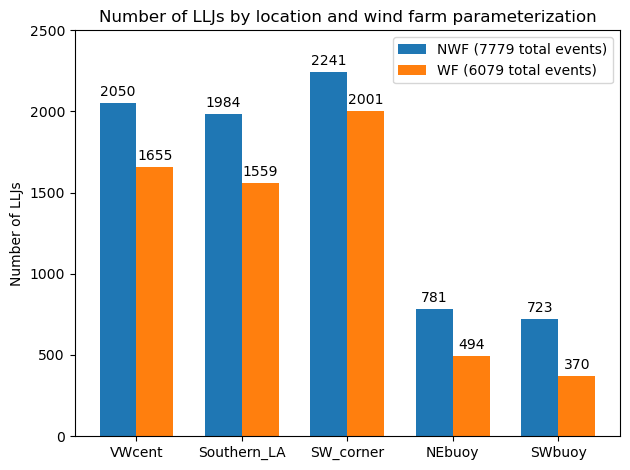

In [11]:
# labels = ['Vineyard Winds centroid',
#           'Southern Lease Area Centroid',
#           'SW corner of Vineyard Winds',
#           'NE buoy (months 7-10)',
#           'SW buoy (months 7-10)']
labels = ['VWcent',
         'Southern_LA',
         'SW_corner',
         'NEbuoy',
         'SWbuoy']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, height=nwf_occ, width=width, label=f'NWF ({sum(nwf_occ)} total events)')
rects2 = ax.bar(x + width/2, height=wf_occ, width=width, label=f'WF ({sum(wf_occ)} total events)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim(0, 2500)
ax.set_ylabel('Number of LLJs')
ax.set_title('Number of LLJs by location and wind farm parameterization')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

#plt.savefig('../output_plots/general_plots/LLJ_counts.png')

In [8]:
from mycolorpy import colorlist as mcp
nwf_colors = mcp.gen_color(cmap="Blues", n=4)
wf_colors = mcp.gen_color(cmap="Oranges", n=4)

In [9]:
nwf_class_ds = nwf.dropna()
wf_class_ds = wf.dropna()
nwf_class_ds.Time = pd.to_datetime(nwf_class_ds.Time)
wf_class_ds.Time = pd.to_datetime(wf_class_ds.Time)

/tmp/ipykernel_1726506/2170661359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwf_class_ds.Time = pd.to_datetime(nwf_class_ds.Time)
/tmp/ipykernel_1726506/2170661359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wf_class_ds.Time = pd.to_datetime(wf_class_ds.Time)


In [10]:
nwf_llj0 = nwf_class_ds[nwf_class_ds['LLJ-classification']==0]
nwf_llj1 = nwf_class_ds[nwf_class_ds['LLJ-classification']==1]
nwf_llj2 = nwf_class_ds[nwf_class_ds['LLJ-classification']==2]
nwf_llj3 = nwf_class_ds[nwf_class_ds['LLJ-classification']==3]

nwf_lljs = [nwf_llj0, nwf_llj1, nwf_llj2, nwf_llj3]

wf_llj0 = wf_class_ds[wf_class_ds['LLJ-classification']==0]
wf_llj1 = wf_class_ds[wf_class_ds['LLJ-classification']==1]
wf_llj2 = wf_class_ds[wf_class_ds['LLJ-classification']==2]
wf_llj3 = wf_class_ds[wf_class_ds['LLJ-classification']==3]

wf_lljs = [wf_llj0, wf_llj1, wf_llj2, wf_llj3]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (12,).

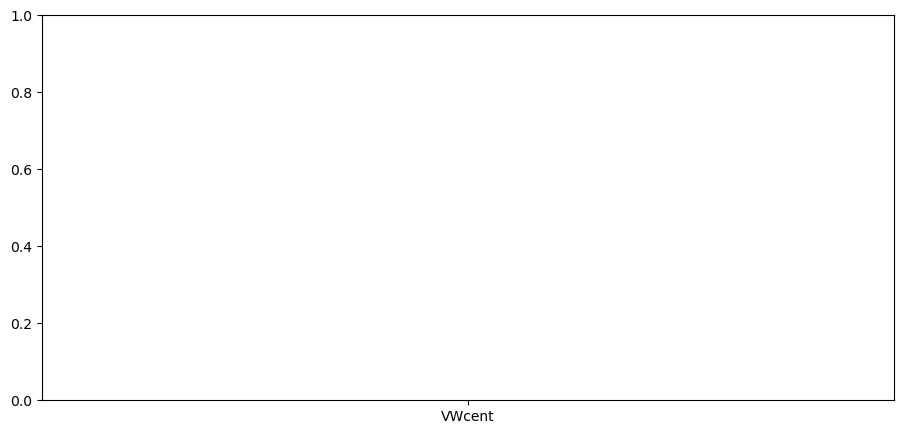

In [15]:
plt.figure(figsize=(11, 5))

ax = plt.gca()

for i, el in enumerate(nwf_lljs):
    
    nwf_hgts = []
    for j in range(len(labels):
        nwf_hgts.append(el.Time.groupby(el.Time.dt.month).count()[j])

    ax.bar(x=labels, height=nwf_hgts, label=f'LLJ{i}', color=nwf_colors[i])

#ax.set_xticklabels(labels)
ax.set_xlabel('Month of the year')
ax.set_ylabel('Number of LLJs')
plt.title(f'LLJ classifications')
plt.legend();

### Timing - seasonal (no NE or SW buoys included)

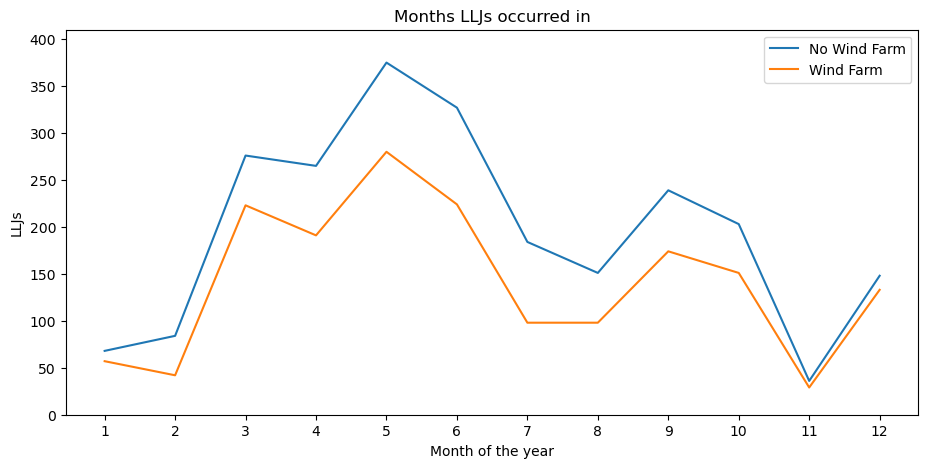

In [7]:
# make non-hisstogram plot
nwf_nobuoy.Time = pd.to_datetime(nwf_nobuoy.Time)
nwf_nobuoy_ = nwf_nobuoy.dropna(axis=0)

wf_nobuoy.Time = pd.to_datetime(wf_nobuoy.Time)
wf_nobuoy_ = wf_nobuoy.dropna(axis=0)

plt.figure(figsize=(11, 5))

ax = plt.gca()

plt.plot(nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.month).count().index,
         nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.month).count().values,
         label="No Wind Farm")
plt.plot(wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.month).count().index,
         wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.month).count().values,
         label="Wind Farm")

ax.set_xticks(np.arange(1, 13))
ax.set_xlabel('Month of the year')
ax.set_ylabel('LLJs')
ax.set_ylim(0, 410)
plt.title(f'Months LLJs occurred in')
plt.legend()

plt.savefig('../output_plots/general_plots/LLJ_seasonal_line.png');

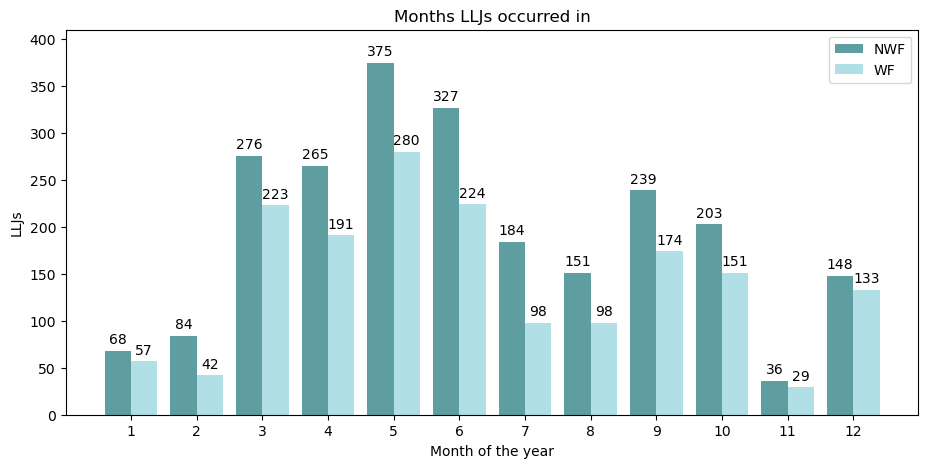

In [7]:
nwf_nobuoy.Time = pd.to_datetime(nwf_nobuoy.Time)
nwf_nobuoy_ = nwf_nobuoy.dropna(axis=0)

wf_nobuoy.Time = pd.to_datetime(wf_nobuoy.Time)
wf_nobuoy_ = wf_nobuoy.dropna(axis=0)

plt.figure(figsize=(11, 5))

ax = plt.gca()

b1 = ax.bar(x=nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.month).count().index -0.2, 
           height=nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.month).count().values,
           width=0.4,
           label='NWF',
           color='cadetblue')

b2 = ax.bar(x=wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.month).count().index +0.2, 
           height=wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.month).count().values,
           width=0.4,
           label='WF',
           color='powderblue')

ax.bar_label(b1, padding=3)
ax.bar_label(b2, padding=3)

ax.set_xticks(np.arange(1, 13))
ax.set_xlabel('Month of the year')
ax.set_ylabel('LLJs')
ax.set_ylim(0, 410)
plt.title(f'Months LLJs occurred in')
plt.legend()

plt.savefig('../output_plots/general_plots/LLJ_seasonal.png');

### Timing - Diurnal

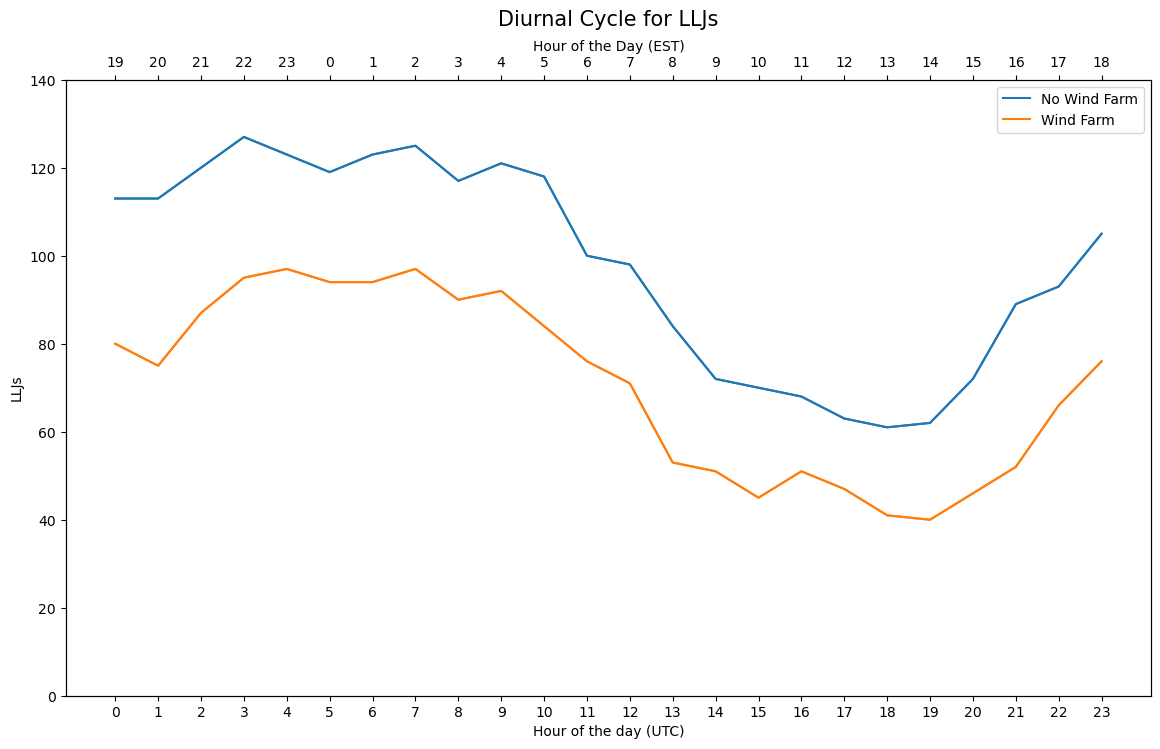

In [17]:
# also make line plot for diurnal
plt.figure(figsize=(14, 8))

ax = plt.gca()
ax2 = ax.twiny()

ax.plot(nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.hour).count().index,
        nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.hour).count().values,
        label="No Wind Farm")
ax.plot(wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.hour).count().index,
        wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.hour).count().values,
        label="Wind Farm")
ax2.plot(nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.hour).count().index,
        nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.hour).count().values,
        label="No Wind Farm")
ax2.plot(wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.hour).count().index,
        wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.hour).count().values,
        label="Wind Farm")

ax.set_xticks(np.arange(0, 24))
ax.set_xlabel('Hour of the day (UTC)')
ax.set_ylabel('LLJs')
ax2.set_xlabel('Hour of the Day (EST)')

ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels((np.arange(0, 24) - 5) % 24)

ax.set_ylim(0, 140)
plt.title(f'Diurnal Cycle for LLJs', fontsize=15, pad=10)
plt.legend()

plt.savefig('../output_plots/general_plots/LLJ_diurnal_line.png');

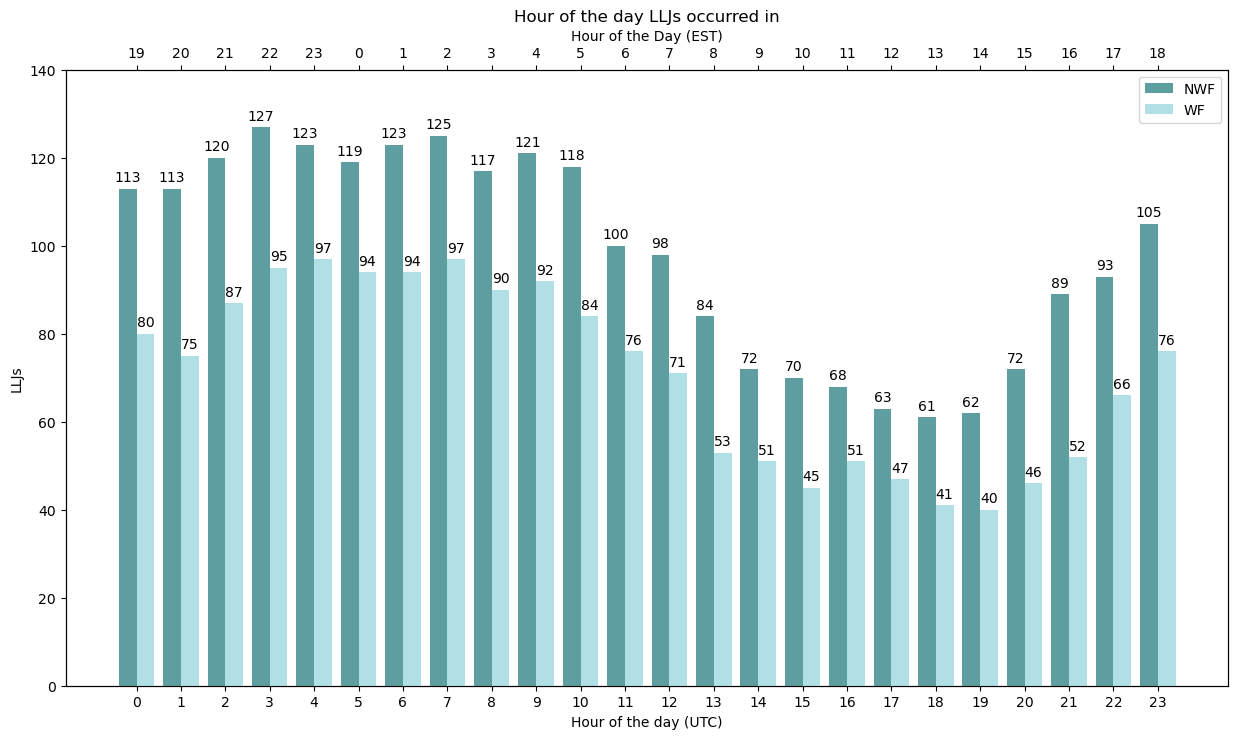

In [8]:
plt.figure(figsize=(15, 8))

ax = plt.gca()
ax2 = ax.twiny()

b1 = ax.bar(x=nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.hour).count().index -0.2, 
           height=nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.hour).count().values,
           width=0.4,
           label='NWF',
           color='cadetblue')

b2 = ax.bar(x=wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.hour).count().index +0.2, 
           height=wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.hour).count().values,
           width=0.4,
           label='WF',
           color='powderblue')
# plot second axes
ax2.bar(x=nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.hour).count().index -0.2, 
           height=nwf_nobuoy_.Time.groupby(nwf_nobuoy_.Time.dt.hour).count().values,
           width=0.4,
           label='NWF',
           color='cadetblue')

ax2.bar(x=wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.hour).count().index +0.2, 
           height=wf_nobuoy_.Time.groupby(wf_nobuoy_.Time.dt.hour).count().values,
           width=0.4,
           label='WF',
           color='powderblue')

ax2.set_xlabel('Hour of the Day (EST)')


ax.bar_label(b1, padding=3)
ax.bar_label(b2, padding=3)

ax.set_xticks(np.arange(0, 24))
ax.set_xlabel('Hour of the day (UTC)')
ax.set_ylabel('LLJs')

ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels((np.arange(0, 24) - 5) % 24)

ax.set_ylim(0, 140)
plt.title(f'Hour of the day LLJs occurred in')
plt.legend()

plt.savefig('../output_plots/general_plots/LLJ_diurnal.png');

### Nose heights

In [1]:
# make df variable for each level of LLJ
l0_nwf = nwf[nwf['LLJ-classification']==0]
l1_nwf = nwf[nwf['LLJ-classification']==1]
l2_nwf = nwf[nwf['LLJ-classification']==2]
l3_nwf = nwf[nwf['LLJ-classification']==3]

l0_wf = wf[wf['LLJ-classification']==0]
l1_wf = wf[wf['LLJ-classification']==1]
l2_wf = wf[wf['LLJ-classification']==2]
l3_wf = wf[wf['LLJ-classification']==3]

custom_lines = [Line2D([0], [0], color='cadetblue', lw=5),
                Line2D([0], [0], color='powderblue', lw=5)]

# make a box plot
plt.figure()
ax = plt.gca()

bplots = plt.boxplot([l0_nwf['Nose height (meters)'], 
                      l0_wf['Nose height (meters)'],
                      l1_nwf['Nose height (meters)'], 
                      l1_wf['Nose height (meters)'],
                      l2_nwf['Nose height (meters)'], 
                      l2_wf['Nose height (meters)'],
                      l3_nwf['Nose height (meters)'], 
                      l3_wf['Nose height (meters)']])

# fill with colors
colors = ['cadetblue', 'powderblue']
# loop through each plot
for i in range(8):
    box = bplots['boxes'][i]
    box_x = []
    box_y = []
    for j in range(4):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    ax.add_patch(Polygon(box_coords, facecolor=colors[i%2]))

ax.set_xticks(np.arange(0, 8, 2)+1.5)
ax.set_xticklabels(np.arange(0, 4))

plt.xlabel('LLJ classification')
plt.ylabel('Nose height (meters)')
plt.title(f'Nose height distribution by LLJ-classification')
ax.legend(custom_lines, ['NWF', 'WF'])

#plt.savefig('../output_plots/general_plots/nose_heights.png');

NameError: name 'nwf' is not defined

### WInd Direction

In [3]:
nwf.Time = pd.to_datetime(nwf.Time)
nwf = nwf.dropna(axis=0)

wf.Time = pd.to_datetime(wf.Time)
wf = wf.dropna(axis=0)

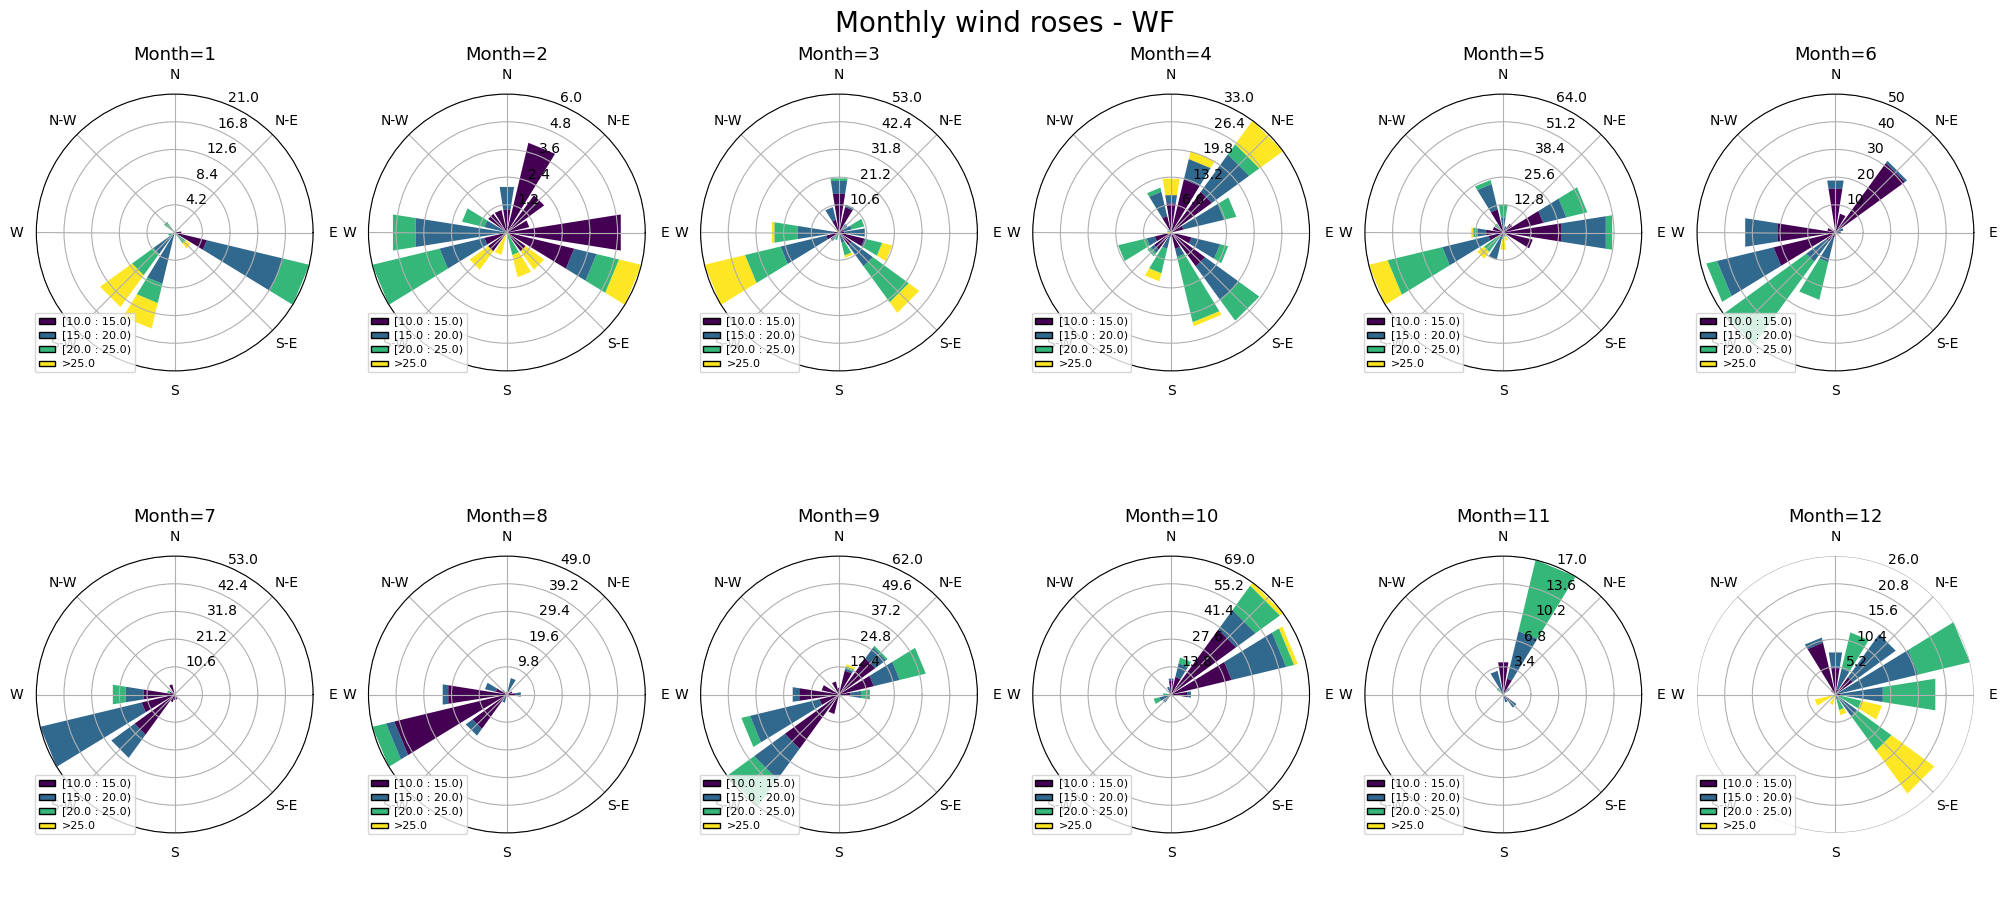

In [4]:
fig = plt.figure(figsize=(25, 11))

plt.axis('off')
plt.title(f"Monthly wind roses - WF", fontsize=20)

for i in range(1, 13):
    df = wf[wf.Time.dt.month == i]
    
    direction = df['Wind direction at nose (degrees)']
    speed = df['Nose windspeed (m/s)']
    
    ax = fig.add_subplot(2, 6, i, projection="windrose")
    ax.bar(direction, speed, bins=np.arange(10, 30, 5))
    ax.set_legend(prop={'size': 6})
    ax.set_title(f'Month={i}', fontsize=13)
plt.box(False)

plt.savefig('../output_plots/general_plots/WF_monthly_windrose.png')

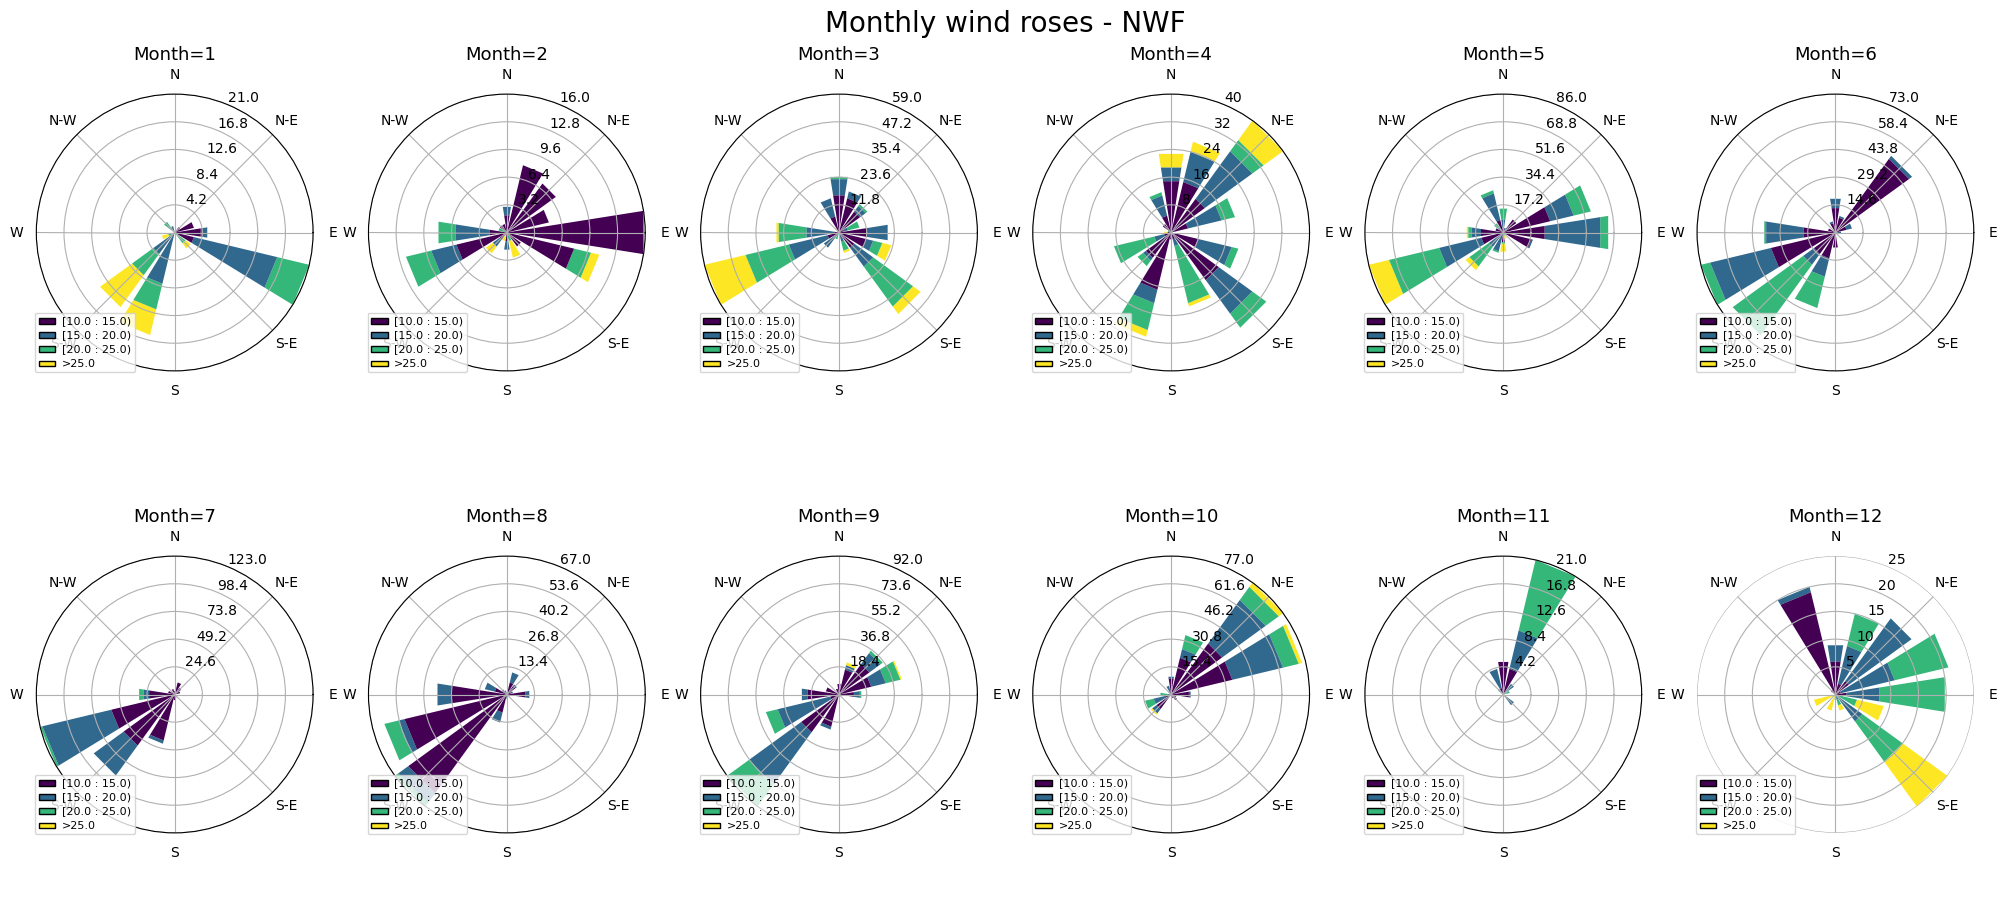

In [5]:
fig = plt.figure(figsize=(25, 11))

plt.axis('off')
plt.title(f"Monthly wind roses - NWF", fontsize=20)

for i in range(1, 13):
    df = nwf[nwf.Time.dt.month == i]
    
    direction = df['Wind direction at nose (degrees)']
    speed = df['Nose windspeed (m/s)']
    
    ax = fig.add_subplot(2, 6, i, projection="windrose")
    ax.bar(direction, speed, bins=np.arange(10, 30, 5))
    ax.set_legend(prop={'size': 6})
    ax.set_title(f'Month={i}', fontsize=13)
plt.box(False)

plt.savefig('../output_plots/general_plots/NWF_monthly_windrose.png')

#### time series of mode wind direction

In [23]:
# convert to datetime
nwf.Time = pd.to_datetime(nwf.Time)

In [5]:
nwf = nwf[nwf['Nose height (meters)']<260]

In [24]:
# sample plot
modes1 = []
modes5 = []
modes10 = []
for i in range(1, 13):
    m1 = np.around(nwf[nwf.Time.dt.month == i].dropna()['Wind direction at nose (degrees)']).mode().values
    m5 = (np.around(nwf[nwf.Time.dt.month == i].dropna()['Wind direction at nose (degrees)']/5)*5).mode().values
    m10 = np.around(nwf[nwf.Time.dt.month == i].dropna()['Wind direction at nose (degrees)'], -1).mode().values
    modes1.append(m1[0])
    modes5.append(m5[0])
    modes10.append(m10[0])

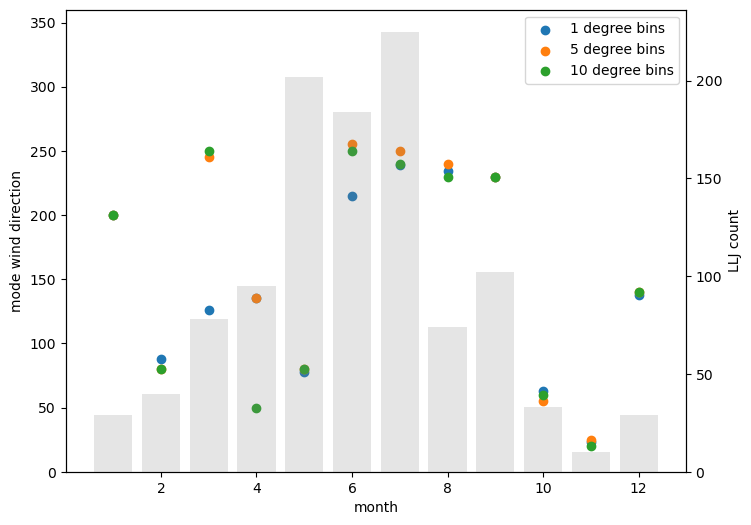

In [25]:
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax2 = ax.twinx()
ax.scatter(np.arange(1, 13), modes1, label='1 degree bins')
ax.scatter(np.arange(1, 13), modes5, label='5 degree bins')
ax.scatter(np.arange(1, 13), modes10, label='10 degree bins')
ax2.bar(x=np.arange(1, 13), 
        height=counts,
        alpha=0.2,
        color='grey')
ax2.set_ylabel('LLJ count')
ax.set_xlabel('month')
ax.set_ylabel('mode wind direction')
ax.set_ylim(0, 360)
ax.legend()

In [13]:
counts = nwf['Nose height (meters)'].groupby(nwf.Time.dt.month).count().values

In [15]:
counts

array([ 29,  40,  78,  95, 202, 184, 225,  74, 102,  33,  10,  29])

#### Composite

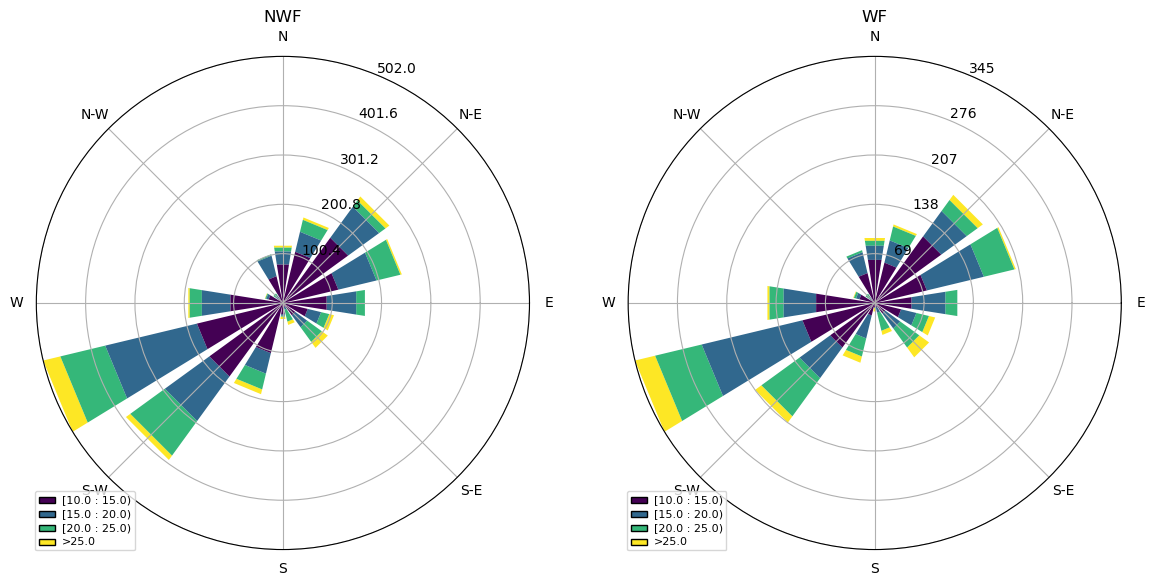

In [6]:
fig = plt.figure(figsize=(14, 10))

for i in range(2):
    if i%2 == 0:
        df = nwf
        title = f"NWF"
    else:
        df = wf
        title = f'WF'

    direction = df['Wind direction at nose (degrees)']
    speed = df['Nose windspeed (m/s)']
    
    ax = fig.add_subplot(1, 2, i + 1, projection="windrose")
    ax.bar(direction, speed, bins=np.arange(10, 30, 5))
    ax.set_legend(prop={'size': 6})
    ax.set_title(title)
    
plt.savefig(f'../output_plots/general_plots/windrose_composites.png')

### Veer plots

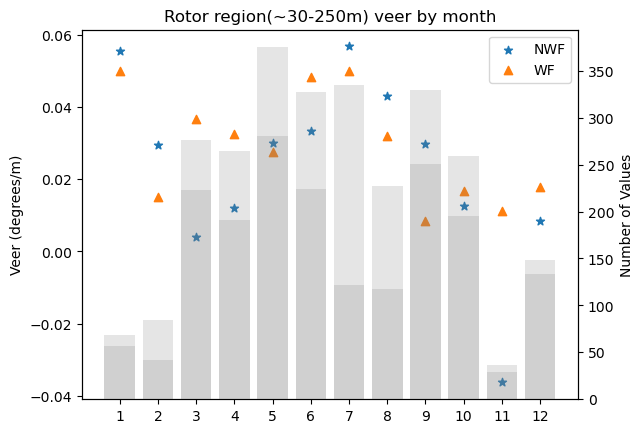

In [7]:
nwf.Time = pd.to_datetime(nwf.Time)
wf.Time = pd.to_datetime(wf.Time)

plt.figure()

ax = plt.gca()
ax2 = ax.twinx()

nwf_veer = nwf['Rotor region veer (degrees/m)'].groupby(nwf.Time.dt.month).mean()
wf_veer = wf['Rotor region veer (degrees/m)'].groupby(wf.Time.dt.month).mean()


ax2.bar(x=np.arange(1, 13), 
        height=nwf['Rotor region veer (degrees/m)'].groupby(nwf.Time.dt.month).count().values,
        alpha=0.2,
        color='grey')
ax2.bar(x=np.arange(1, 13), 
        height=wf['Rotor region veer (degrees/m)'].groupby(wf.Time.dt.month).count().values,
        alpha=0.2,
        color='grey')
ax.scatter(x=np.arange(1, 13), y=nwf_veer, marker='*', label='NWF')
ax.scatter(x=np.arange(1, 13), y=wf_veer, marker='^', label='WF')

plt.title(f'Rotor region(~30-250m) veer by month')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13))
ax.set_ylabel('Veer (degrees/m)')
ax2.set_ylabel('Number of Values')
ax.legend()

plt.savefig('../output_plots/general_plots/rotor_veer.png')

In [9]:
nwf['Rotor region veer (degrees/m)'].groupby(nwf.Time.dt.month)

### Wind speed histogram

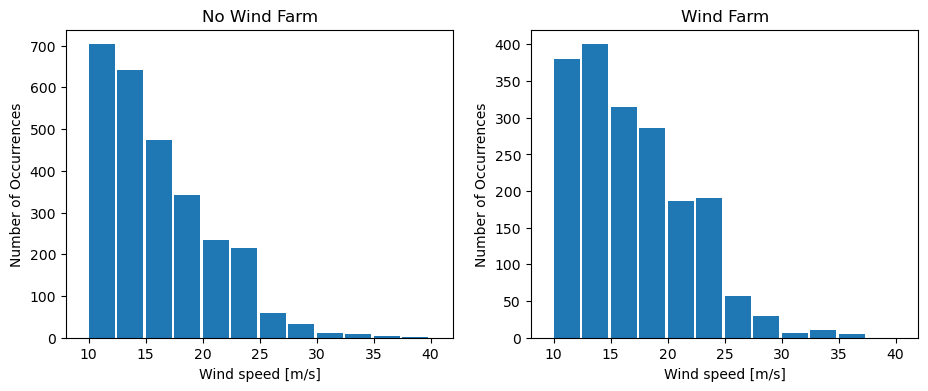

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

ax[0].hist(nwf['Nose windspeed (m/s)'], bins=np.arange(10, 45, 2.5), width=2.3)
ax[0].set_xlabel("Wind speed [m/s]")
ax[0].set_xlim(8, 42)
ax[0].set_ylabel("Number of Occurrences")
ax[0].set_title("No Wind Farm")

ax[1].hist(wf['Nose windspeed (m/s)'], bins=np.arange(10, 45, 2.5), width=2.3)
ax[1].set_xlabel("Wind speed [m/s]")
ax[1].set_xlim(8, 42)
ax[1].set_ylabel("Number of Occurrences")
ax[1].set_title("Wind Farm")

fig.savefig('../output_plots/general_plots/windspeed_hist.png');

In [5]:
hhws_ = pd.read_csv('../non-LLJdata/ws_files/vwcent_hub_height_ws.csv')

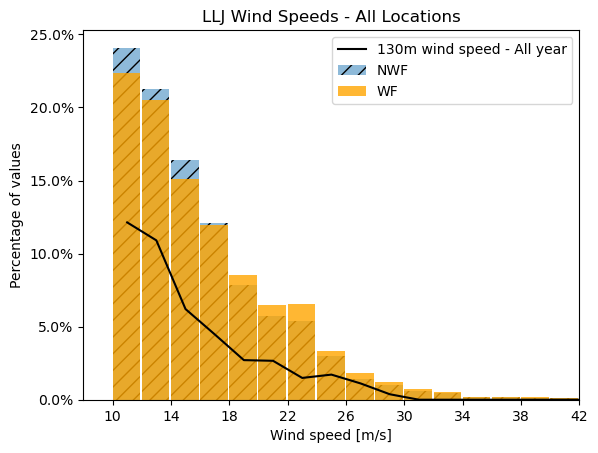

In [13]:
# add in hub height wind speed for whole year - switch to percentage of values
from matplotlib.ticker import PercentFormatter
import numpy as np
weight1 = np.ones(len(nwf['Nose windspeed (m/s)'].dropna())) / len(nwf['Nose windspeed (m/s)'].dropna())
weight2 = np.ones(len(wf['Nose windspeed (m/s)'].dropna())) / len(wf['Nose windspeed (m/s)'].dropna())
weight3 = np.ones(len(hhws_['130m ws'].dropna())) / len(hhws_['130m ws'].dropna())

plt.figure()
ax = plt.gca()

# plot the hub height wind speed as a line
bins=np.arange(10, 45, 2)
hhws = hhws_['130m ws']
hh100ws = hhws_['230m ws']
n,x = np.histogram(hhws.dropna(), bins=bins, weights=weight3)
bin_centers = 0.5*(x[1:]+x[:-1])
ax.plot(bin_centers,n, color='k', label='130m wind speed - All year')

ax.hist(nwf['Nose windspeed (m/s)'].dropna(), bins=np.arange(10, 45, 2), weights=weight1, width=1.9, label='NWF', color='tab:blue', alpha=0.5, hatch='//')
ax.hist(wf['Nose windspeed (m/s)'].dropna(), bins=np.arange(10, 45, 2), weights=weight2, width=1.9, label='WF', color='orange', alpha=0.8)

ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xlabel("Wind speed [m/s]")
ax.set_xlim(8, 42)
ax.set_xticks(range(10, 44, 4))
ax.set_ylabel("Percentage of values")
ax.set_title("LLJ Wind Speeds - All Locations")
ax.legend()

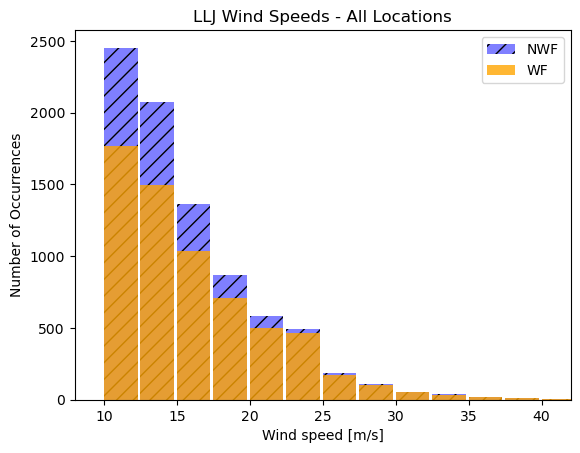

In [3]:
plt.figure()
ax = plt.gca()

ax.hist(nwf['Nose windspeed (m/s)'], bins=np.arange(10, 45, 2.5), width=2.3, label='NWF', color='tab:blue', alpha=0.5, hatch='//')
ax.hist(wf['Nose windspeed (m/s)'], bins=np.arange(10, 45, 2.5), width=2.3, label='WF', color='orange', alpha=0.8)

ax.set_xlabel("Wind speed [m/s]")
ax.set_xlim(8, 42)
ax.set_ylabel("Number of Occurrences")
ax.set_title("LLJ Wind Speeds - All Locations")
ax.legend()

# plt.savefig('../output_plots/paper_plots/windspeed_hist.png', bbox_inches='tight');

In [12]:
wf['Nose windspeed (m/s)'].max()

45.785675048828125